# Degree Centrality on the Karate Club data set

Here we compute degree centrality again, but this time without the use of the networkX toolbox, and now using the famous karate club data set first introduced by Zachery

### Import

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read Zach's Karate Club Dataset

In [ ]:
data = pd.read_csv('../../data/graph_data/karate_club.csv',header=None).values
coords = pd.read_csv('../../data/graph_data/karate_club_coords.csv',header=None).values

### Create Graph Dictionary

In [126]:
graph = {}
nodelist = []
for item in data:
    node1,node2 = item
    node1 = node1 - 1
    node2 = node2 - 1
    nodelist.append(node1)
    nodelist.append(node2)
    if node1 in graph:
        edges = graph[node1]
        edges.append(node2)
        graph[node1] = edges
    else:
        graph[node1] = [node2]
    if node2 in graph:
        edges = graph[node2]
        edges.append(node1)
        graph[node2] = edges
    else:
        graph[node2] = [node1]

### Unique List of Nodes

In [127]:
nodelist = list(np.unique(nodelist))

### Breath First Search Init

In [128]:
start_node = 0
end_node = 30
queue = [start_node]
visited = np.zeros((len(nodelist)))

### Breadth first search

In [129]:
path_bfs = []
path_found = False
while (len(queue) > 0):
    node = queue[0]
    path_bfs.append(node)
    visited[node] = 1
    queue = queue[1:]
    neigbors = graph[node]
    for neighbor in neigbors:
        if (neighbor == end_node):
            queue = []
            path_found = True
            path_bfs.append(neighbor)
            break
        if visited[neighbor] == 0:
            queue.append(neighbor)

### Depth First Search Init

In [130]:
start_node = 0
end_node = 30
queue = [start_node]
visited = np.zeros((len(nodelist)))

### Depth first search recursive helper

In [167]:
path_dfs = []
path_found = False
while (len(queue) > 0):
    node = queue[0]
    path_dfs.append(node)
    visited[node] = 1
    queue = queue[1:]
    neigbors = graph[node]
    for neighbor in neigbors:
        if (neighbor == end_node):
            queue = []
            path_found = True
            path_dfs.append(neighbor)
            break
        if visited[neighbor] == 0:
            queue = [neighbor] + queue

### Plot the graph

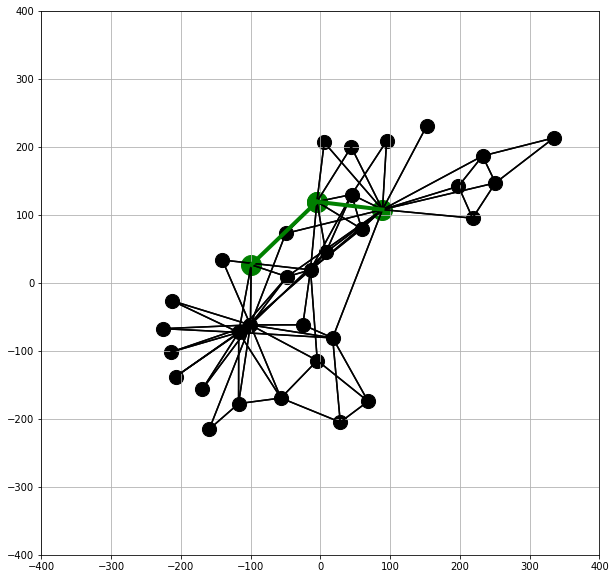

In [168]:
plt.figure(figsize=(10,10))
plt.scatter(coords[:,0],coords[:,1],c='k',s=200)
plt.grid()
plt.axis((-400,400,-400,400))
for node in graph:
    edges = graph[node]
    for edge in edges:
        plt.plot([coords[node,0],coords[edge,0]],[coords[node,1],coords[edge,1]],'k')
for i in range(len(path_dfs)-1):
    node1 = path_dfs[i]
    node2 = path_dfs[i+1]
    plt.scatter(coords[node1,0],coords[node1,1],c='r',s=400)
    plt.scatter(coords[node2,0],coords[node2,1],c='r',s=400)
    plt.plot([coords[node1,0],coords[node2,0]],[coords[node1,1],coords[node2,1]],'r',linewidth=4)
    
for i in range(len(path_bfs)-1):
    node1 = path_bfs[i]
    node2 = path_bfs[i+1]
    plt.scatter(coords[node1,0],coords[node1,1],facecolor='g',s=400)
    plt.scatter(coords[node2,0],coords[node2,1],facecolor='g',s=400)
    plt.plot([coords[node1,0],coords[node2,0]],[coords[node1,1],coords[node2,1]],'g',linewidth=4)